## Sunspot task

The Sunspot task consists in a next-step prediction (autoregressive, a particular case of transduction) on a [time-series](https://drive.google.com/file/d/1GK5fqzuAGoo466PIxhnwxtSP0r3uDFWa/view?usp=sharing) consisting in monthly averaged solar sunspots.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import itertools

from liquid_state_machine import LSM

In [2]:
dset = pd.read_csv('./solar_data.csv', header=None).to_numpy().squeeze()
dset

array([ 58. ,  62.6,  70. , ..., 132. , 105.2, 147. ])

In [3]:
dset.shape

(2899,)

Properly separate input and target data, then split the available data in
- training (first 2398 time steps), and
- test set (the subsequent 500 time steps).

In [4]:
#input_dset, target_dset = dset[:,:-1], dset[:,1:]
x_test = dset[-501:]
train = dset[:2398] 
tsize = int(len(train)*0.75)
x_val = train[tsize:]
x_train = train[:tsize]
y_train, y_val, y_test=x_train[1:], x_val[1:], x_test[1:]
x_train, x_val, x_test = x_train[:-1], x_val[:-1], x_test[:-1]

In [5]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((1797,), (599,), (500,), (1797,), (599,), (500,))

Plot the time series of the sunspots

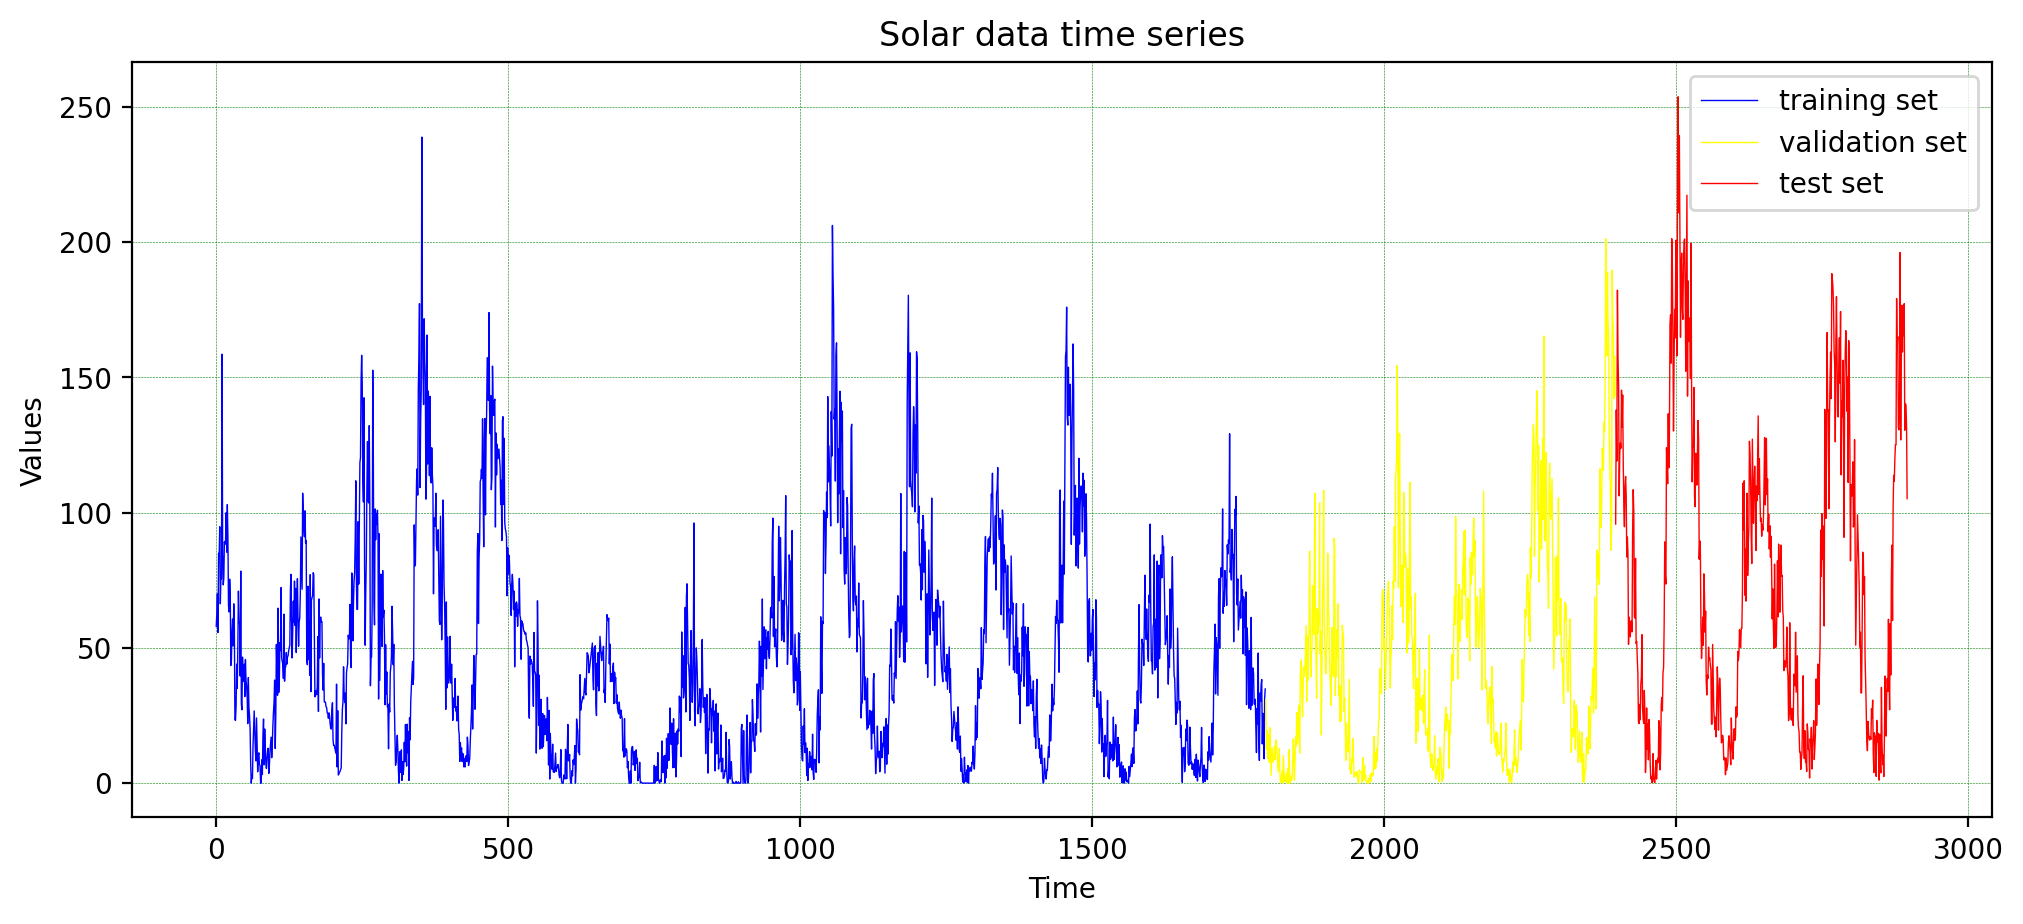

In [6]:
limit1=int(x_train.shape[0])
limit2=int(x_train.shape[0]+x_val.shape[0])
limit3=int(limit2+x_test.shape[0])

plt.figure(figsize=(12,5), dpi=200)
plt.plot(range(0,limit1), x_train, color="blue", linewidth=0.5, label="training set") 
plt.plot(range(limit1,limit2), x_val, color="yellow", linewidth=0.5, label="validation set") 
plt.plot(range(limit2,limit3), x_test, color="red", linewidth=0.5, label="test set") 

plt.title("Solar data time series")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)
plt.savefig(str('plots/timeseries.jpeg'), edgecolor='black', dpi=400, transparent=True)
plt.show()

#### Grid search

In [7]:
params={
    'epochs':[10, 50, 100],
    'units':[100, 250, 500],
    'win_e':[2, 4, 5, 6, 8], 
    'win_i':[1, 2, 3, 4, 5],
    'w_e':[0.2, 0.5, 0.8, 1, 1.5, 2],
    'w_i':[0.5, 1, 1.5, 2]
}


In [ ]:

class GS:
    
    def __init__(self, parameters:dict, Xset: tuple, Yset: tuple):
        #super(CLASS_NAME, self).__init__(*args, **kwargs)
        
        #parameters grid
        keys=self.parameters.keys() 
        combinations=itertools.product(*self.parameters.values())
        datasets=[dict(zip(keys,cc)) for cc in combinations]
        self.Xset=Xset
        self.YSet=Yset
    
    @staticmethod
    def search(self, Xset, Yset, model, folds):       
        for ds in self.datasets:
            model = LSM(
                epochs=ds['epochs'],
                units=ds['units'],
                win_e=ds['win_e'],
                win_i=ds['win_i'],
                w_e=ds['w_e'],
                w_i=ds['w_i']
            )
            Ypred=model.fit(Xset,Yset)
            error=mean_absolute_error(Yset,Ypred)
            
        
    @staticmethod
    def evaluate(self,  Xset, Yset):
        
    
    
    
    